In [57]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
filterwarnings(action='ignore')

In [3]:
import matplotlib

filterwarnings(action='ignore')
plt.style.use('ggplot')
pal = sns.color_palette()
matplotlib.rc('axes.formatter', useoffset=False)

In [4]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

In [5]:
train_df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [6]:
test_df

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


## Check the datasets

### Checking NaNs

In [7]:
# train set

train_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
# test set

test_df.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [9]:
for col in train_df.columns:
    train_df[col].fillna(f'{col}_filled_by_me', inplace=True)

for col in test_df.columns:
    test_df[col].fillna(f'{col}_filled_by_me', inplace=True)

### Balanced or not

In [10]:
# checking whether the target distribution is balanced or not

train_df.groupby('label', as_index=False)['label'].count()

,label
0,10387
1,10413


we can see that the dataset is pretty balanced. thanks god, no time for resampling techniques.

### Duplicate rows

In [11]:
train_df.duplicated().sum()

0

## EDA

In [45]:
grouped_authors = train_df.groupby('author', as_index=False).agg(
    total_news=('label', 'count'), fake_news=('label', 'sum'))

grouped_authors = grouped_authors[grouped_authors['total_news'] >= 80].sort_values(
    by='total_news', ascending=False)

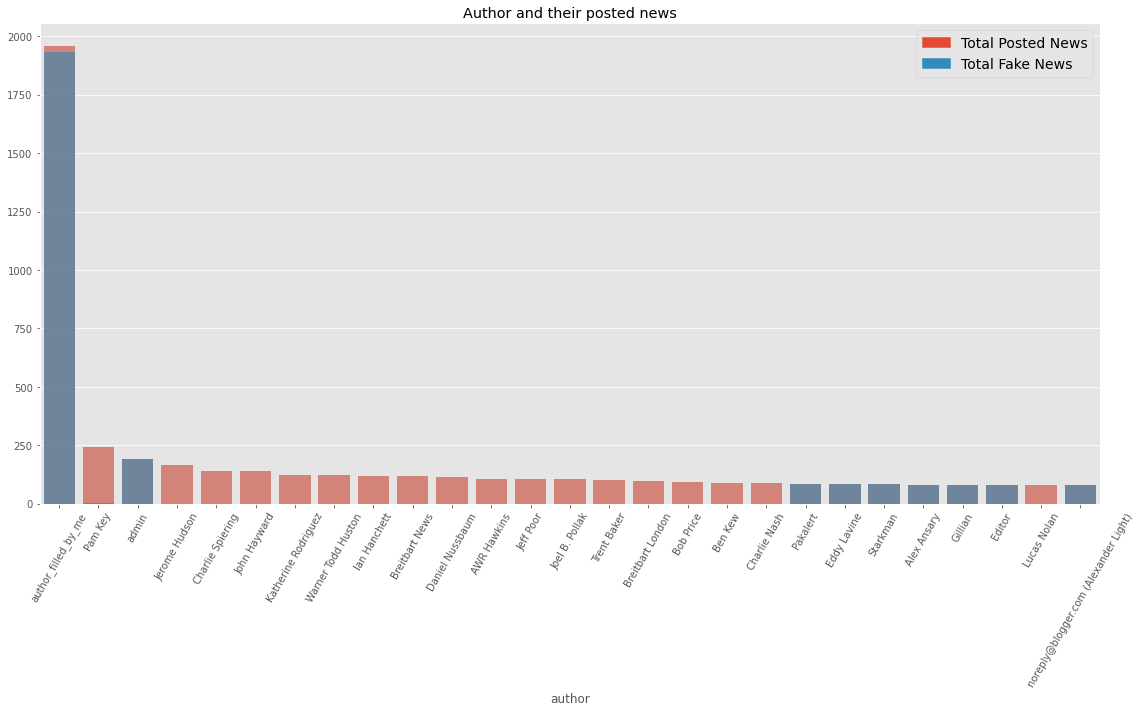

In [61]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.barplot(x=grouped_authors['author'],
            y=grouped_authors['total_news'], ax=ax, color=pal[0], alpha=0.7)

sns.barplot(x=grouped_authors['author'],
            y=grouped_authors['fake_news'], ax=ax, color=pal[1], alpha=0.7)

p1 = mpatches.Patch(color=pal[0], label='Total Posted News')
p2 = mpatches.Patch(color=pal[1], label='Total Fake News')

plt.title('Author and their posted news')
plt.ylabel('')
plt.xticks(rotation=60)
plt.tight_layout()
plt.legend(handles=[p1, p2], fontsize=14)